In [42]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)
import dask.dataframe as dd
import os

In [43]:
# # Importando dicionário de dados fornecido - informações sobre as variáveis e visualizando seu tamanho
# dic = pd.read_excel('DATABASE/dicionario_PNS_microdados_2019_FELCRUZ.xls', skiprows=1)
# # Visualizando o cabeçalho e alguns dados do dicionário
# dic.head(5)

In [44]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
df = pd.read_csv('DATABASE/PNS_2019.csv', sep=';', low_memory=False)
df.head()


,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,G033,G034,G035,G036,G038,G039,G040,G041,G042,G044,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G057,G058,G05801,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G070,G071,G072,G073,G074,G075,G076,G077,G079,G080,G081,G082,G083,G084,G085,G086,G032,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,K001,K004,K007,K010,K013,K016,K019,K01901,K02001,K02101,K02102,K022,K025,K028,K031,K034,K03401,K03501,K03601,K03602,K04301,K04302,K04401,K045,K046,K047,K048,K050,K051,K052,K05302,K05401,K05402,k055,K05601,K05602,K062,L01701,L01702,L01703,L01704,L01705,L01706,L01707,L01708,L01709,L01710,L01711,L01712,L01713,L01714,L01715,L01716,L018,L019,L021,L022,L023,L024,L025,L026,L027,L028,L029,L030,L031,L032,L033,L034,L035,L036,L037,L038,L039,L040,L042,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P056,P05601,P05602,P05603,P05604,P05605,P057,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q

In [45]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1063), int64(9), object(15)
memory usage: 2.4+ GB


In [46]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[
   [
      'V0001',
      'Q092',
      'N00101',
      'N012',
      'N016',
      'N017',
      'N018',
      'P027',
      'P02801',
      'P029',
      'P03301',
      'P03001',
      'Q09301',
      'Q094',
      'Q09502',
      'Q09606',
      'Q10101',
      'Q10701',
      'Q109',
      'C006',
      'C009',
      'J001',
      'J00402',
      'C008'
   ]
]

In [47]:
nomes_reduzidos = {
    'V0001' : 'UF',
    'Q092' : 'Diagnóstico Depressão',
    'C008': 'Idade',
    'N00101' : 'Estado de Saúde',
    'N012' : 'Pouco Interesse',
    'N016' : 'Sentimento Depressivo',
    'N017' : 'Sentimento de Fracasso',
    'N018' : 'Ideação Suicida',
    'P027' : 'Consumo Álcool',
    'P02801' : 'Dias Álcool',
    'P029': 'Quantidade Bebida',
    'P03301': 'Faltas por Bebida',
    'P03001' : 'Dirigir Embriagado',
    'Q09301' : 'Idade Diagnóstico',
    'Q094' : 'Visita Regular',
    'Q09502' : 'Motivo Não Visita',
    'Q09606' : 'Toma Medicamentos',
    'Q10101' : 'Último Atendimento',
    'Q10701' : 'Compareceu Consulta',
    'Q109' : 'Limitação Atividade',
    'C006' : 'Sexo',
    'C009' : 'Cor Raça',
    'J001' : 'Estado de Saúde Geral',
    'J00402' : 'Motivo Impedimento'
}

In [48]:
# Renomeando as colunas
df = df.rename(columns=nomes_reduzidos)

<AxesSubplot: >

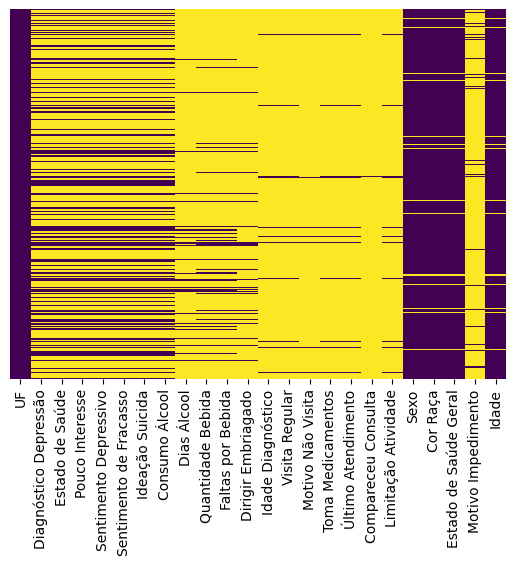

In [49]:
# Vendo o gráfico de quantidade de dados vazios
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
# converte colunas para número
df = df.apply(pd.to_numeric)

In [51]:
df.shape

(293726, 24)

In [52]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0
counts = df['Diagnóstico Depressão'].value_counts()
counts

2.0    82514
1.0     8332
Name: Diagnóstico Depressão, dtype: int64

In [53]:
df.columns

Index(['UF', 'Diagnóstico Depressão', 'Estado de Saúde', 'Pouco Interesse',
       'Sentimento Depressivo', 'Sentimento de Fracasso', 'Ideação Suicida',
       'Consumo Álcool', 'Dias Álcool', 'Quantidade Bebida',
       'Faltas por Bebida', 'Dirigir Embriagado', 'Idade Diagnóstico',
       'Visita Regular', 'Motivo Não Visita', 'Toma Medicamentos',
       'Último Atendimento', 'Compareceu Consulta', 'Limitação Atividade',
       'Sexo', 'Cor Raça', 'Estado de Saúde Geral', 'Motivo Impedimento',
       'Idade'],
      dtype='object')

In [54]:
# Filtros para buscar possível diagnóstico de não depressão

# Condição 1: Diagnóstico de depressão é nulo ou igual a 2.0
condicao1 = df['Diagnóstico Depressão'].isin([None, 2.0])

# Condição 2: Consumo de álcool é 1.0 ou 2.0
condicao2 = df['Consumo Álcool'].isin([1.0, 2.0])

# Condição 3: Sentimento depressivo é 1.0 ou 2.0
condicao3 = df['Sentimento Depressivo'].isin([1.0, 2.0])

# Condição 4: Estado de saúde é igual a 1.0
condicao4 = df['Estado de Saúde'] == 1.0

# Condição 5: Motivo de impedimento não é igual a 12.0
condicao5 = df['Motivo Impedimento'] != 12.0

# Aplicar todas as condições para obter o DataFrame final
df_possivel_sem_depressao = df.loc[condicao1 & condicao2 & condicao3 & condicao4 & condicao5]

df_possivel_sem_depressao.shape





(8444, 24)

In [55]:
condicao = df['Diagnóstico Depressão'] == 1.0
df_so_depressao = df.loc[condicao]

<AxesSubplot: >

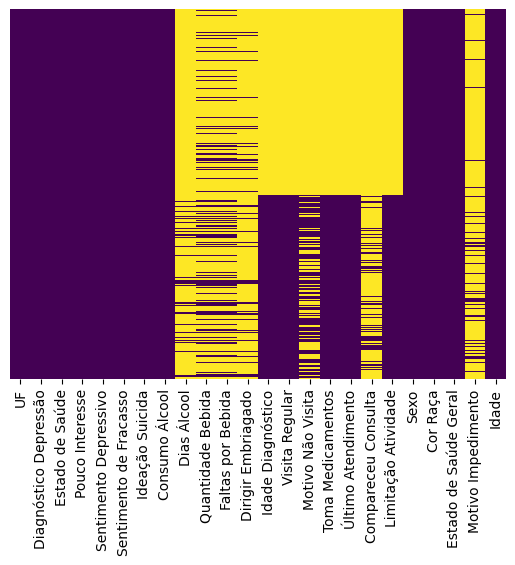

In [56]:
df_tratado = pd.concat([df_possivel_sem_depressao, df_so_depressao], axis=0)

sns.heatmap(df_tratado.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
# Atualizando a idade das pessoas para o ano de 2023

df_tratado['Idade'] = df_tratado['Idade'] + 4.0
df_tratado['Idade']

57        36.0
59        54.0
61        51.0
65        24.0
94        65.0
          ... 
293584    52.0
293610    81.0
293629    53.0
293694    55.0
293718    58.0
Name: Idade, Length: 16776, dtype: float64

In [58]:
counts = df_tratado['Diagnóstico Depressão'].value_counts()
counts

2.0    8444
1.0    8332
Name: Diagnóstico Depressão, dtype: int64

In [59]:
# Tratando dados categóricos do Dataframe reduzido 

dicionario_uf = pd.read_json(os.getcwd() + '/DATABASE/Json/DD_UF.json')
dicionario_uf = pd.json_normalize(dicionario_uf['UFs'])
dicionario_uf

df_uf_tratado = df_tratado.merge(dicionario_uf, left_on='UF', right_on='Código UF', how='left')
df_uf_tratado

,UF_x,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,Faltas por Bebida,Dirigir Embriagado,Idade Diagnóstico,Visita Regular,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento,Idade,Código UF,UF_y
0,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,36.0,11.0,RO
1,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,54.0,11.0,RO
2,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,51.0,11.0,RO
3,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,NaN,24.0,11.0,RO
4,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,65.0,11.0,RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,53,1.0,2.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,45.0,2.0,1.0,2.0,4.0,NaN,1.0,2.0,1.0,2.0,NaN,52.0,53.0,DF
17246,53,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,37.0,2.0,1.0,1.0,2.0,NaN,1.0,2.0,1.0,2.0,NaN,81.0,53.0,DF
17247,53,1.0,3.0,2.0,2.0,1.0,1.0,3.0,0.0,3.0,1.0,2.0,24.0,2.0,4.0,2.0,5.0,NaN,3.0,1.0,3.0,3.0,1.0,53.0,53.0,DF
17248,53,1.0,3.0,3.0,4.0,1.0,1.0,3.0,1.0,7.0,1.0,1.0,35.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,55.0,53.0,DF


In [60]:
#Tratando dados nulos e convertendo os tipos das colunas

# Substituir 'Null' por NaN
df = df.replace('Null', pd.NA)

# Converter a coluna para inteiros, tratando NaN como apropriado
df['Diagnóstico Depressão'] = df['Diagnóstico Depressão'].astype(float).astype('Int64')


# df = df.fillna(value='')

# df = df.astype(np.int64)
# df['UF'] = df['UF'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UF                      293726 non-null  int64  
 1   Diagnóstico Depressão   90846 non-null   Int64  
 2   Estado de Saúde         90846 non-null   float64
 3   Pouco Interesse         90846 non-null   float64
 4   Sentimento Depressivo   90846 non-null   float64
 5   Sentimento de Fracasso  90846 non-null   float64
 6   Ideação Suicida         90846 non-null   float64
 7   Consumo Álcool          90846 non-null   float64
 8   Dias Álcool             24323 non-null   float64
 9   Quantidade Bebida       35416 non-null   float64
 10  Faltas por Bebida       35416 non-null   float64
 11  Dirigir Embriagado      21888 non-null   float64
 12  Idade Diagnóstico       8332 non-null    float64
 13  Visita Regular          8332 non-null    float64
 14  Motivo Não Visita   

In [61]:
# Salvando arquivo reduzido como csv
df_tratado.to_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep=',', encoding='utf-8')